# <span style="color:blue"> NSL Exercise lesson 10. </span> 

## <span style="color:red"> Exercise 10.1. </span>

The aim of this exercise is quite simple: modifying the previously written genetic algorithm in order to solve the TSP exploiting a simulated annealing approach. In order to achieve such goal, the code uses the same genetic mutations of lesson 9 as proposed moves of SA.

As in the previous exercise lesson, the simulation is carried out using 32 cities. However, this time it was decide to use the following parameters:

- start temperature of the system: $T_{start} = 4$
- end temperature of the system: $T_{start} = 0.001$
- 2000 temperature steps
- 300 move-steps per each temperature

Below, you can find the results of the simulations carried out in the case of a circular world. They are compared to the results obtained via genetic algorithm.

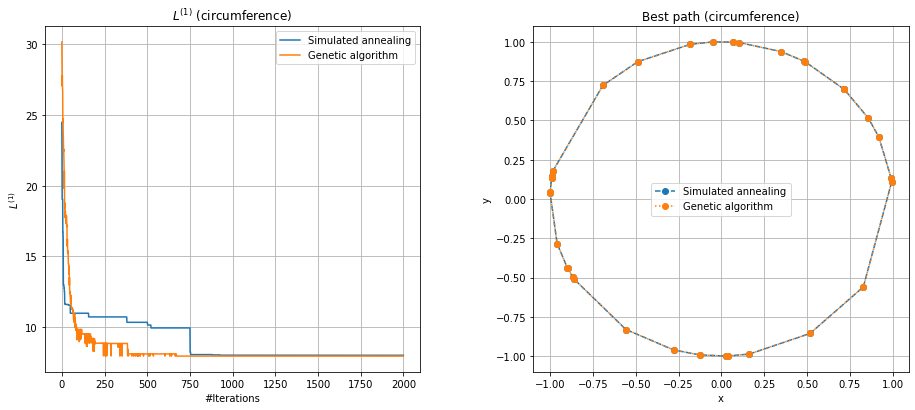

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#Circular world
f, ax = plt.subplots(1,2)

t_gen, L_SA = np.loadtxt("Datas/L1_SA_circ.dat", usecols=(0,1), unpack='true')
L_GA = np.loadtxt("Datas/L1_GA_circ.dat", usecols=1, unpack='true')
ax[0].plot(t_gen, L_SA, label="Simulated annealing")
ax[0].plot(t_gen,L_GA, label="Genetic algorithm")
ax[0].set_title('$L^{(1)}$ (circumference)')
ax[0].set(xlabel="#Iterations", ylabel='$ L^{(1)} $')
ax[0].legend()
ax[0].grid(True)

x_sa, y_sa = np.loadtxt("Datas/path_SA_circ.dat", usecols=(0,1), unpack='true')
x_ga, y_ga = np.loadtxt("Datas/path_GA_circ.dat", usecols=(0,1), unpack='true')
ax[1].plot(x_sa, y_sa, marker = "o", label="Simulated annealing", linestyle="dashed")
ax[1].plot(x_ga, y_ga, marker = "o", label="Genetic algorithm", linestyle="dotted")
ax[1].set_title("Best path (circumference)")
ax[1].set(xlabel="x", ylabel="y")
ax[1].legend()
ax[1].grid(True)

plt.subplots_adjust(left=0.2, bottom=0., right=2.2, top=1.2, wspace=0.3, hspace=0.4) 

plt.show()

As you can see, starting from $N_{iterations} = 750$ the two different algorithms give back the same extimation of the length of the best path. At the same time, the pictures of such paths are identical.

Then, using the same parameters as above, the simulation is repeated using 32 cities inside a square. Below, you can find the results compared again with the ones obtained via genetic algorithm.

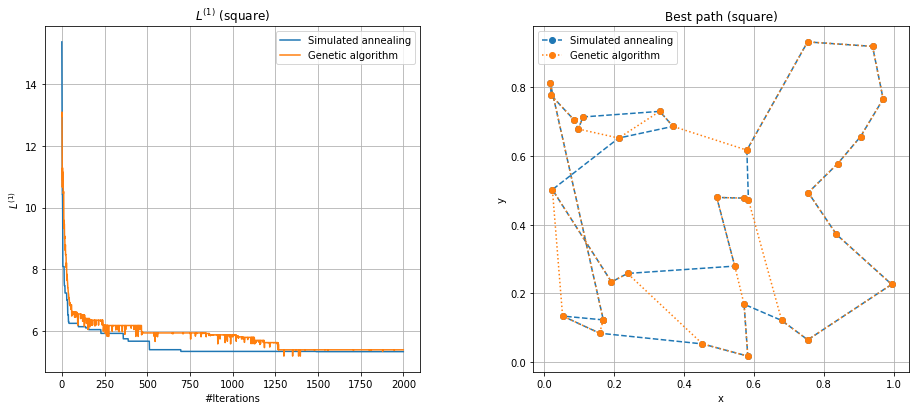

In [2]:
#Square world
f, ax = plt.subplots(1,2)

t_gen, L_SA = np.loadtxt("Datas/L1_SA_square.dat", usecols=(0,1), unpack='true')
L_GA = np.loadtxt("Datas/L1_GA_square.dat", usecols=1, unpack='true')
ax[0].plot(t_gen, L_SA, label="Simulated annealing")
ax[0].plot(t_gen,L_GA, label="Genetic algorithm")
ax[0].set_title('$L^{(1)}$ (square)')
ax[0].set(xlabel="#Iterations", ylabel='$ L^{(1)} $')
ax[0].legend()
ax[0].grid(True)

x_sa, y_sa = np.loadtxt("Datas/path_SA_square.dat", usecols=(0,1), unpack='true')
x_ga, y_ga = np.loadtxt("Datas/path_GA_square.dat", usecols=(0,1), unpack='true')
ax[1].plot(x_sa, y_sa, marker = "o", label="Simulated annealing", linestyle="dashed")
ax[1].plot(x_ga, y_ga, marker = "o", label="Genetic algorithm", linestyle="dotted")
ax[1].set_title("Best path (square)")
ax[1].set(xlabel="x", ylabel="y")
ax[1].legend()
ax[1].grid(True)

plt.subplots_adjust(left=0.2, bottom=0., right=2.2, top=1.2, wspace=0.3, hspace=0.4) 

plt.show()

This time, we have to note that, even though the extimations of the two algorithms are compatible starting from $N_{iterations}\approx1250$, the pictures of the best path are not identical but slightly different.

## <span style="color:red"> Exercise 10.2. </span>

This exercise requires to parallelize the GA algorithm written in lesson 9 exploiting the MPI libraries. As you can find in attached C++ code, the parallelization is implemented asking that 4 'continents' (i.e. four parallel nodes) exchange their best individuals every time the number of generations $N_{generations}$ is a multiple of the number of migrations $N_{migrations}$. Therefore, choosing $N_{generations}=2\cdot10^3$ and $N_{migrations}=10$, the continents talk to each other exactly 200 times. Also, it was chosen as number of individuals per generation $N_{individuals}=500$. Below, you can find a picture of $\langle L^{(1)}\rangle$, averaged on the best half of the population, for all the nodes.

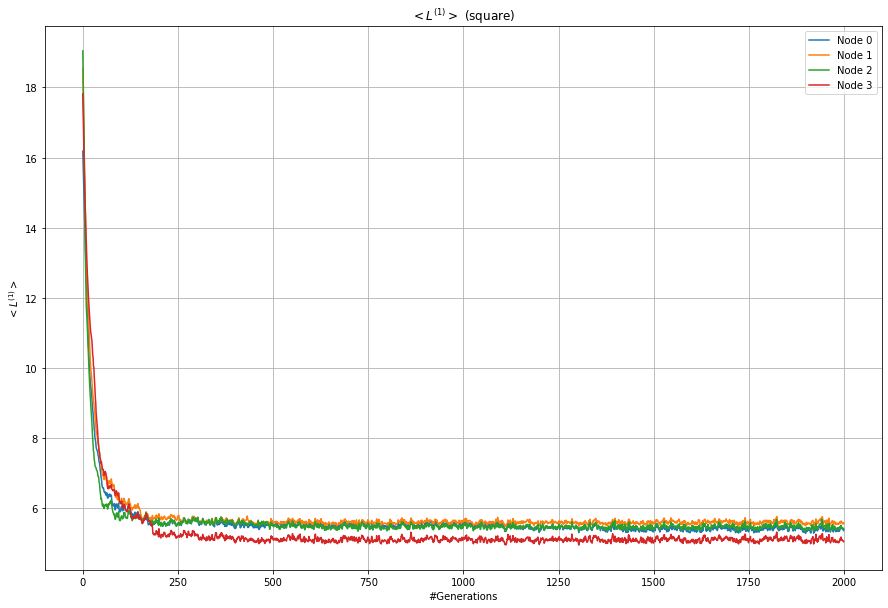

In [3]:
plt.figure(figsize = (15, 10))

gen, L_0 = np.loadtxt("Datas/ave_L1_0.dat", unpack = True)
L_1= np.loadtxt("Datas/ave_L1_1.dat", usecols=(1), unpack = True)
L_2 = np.loadtxt("Datas/ave_L1_2.dat", usecols=(1), unpack = True)
L_3 = np.loadtxt("Datas/ave_L1_3.dat", usecols=(1), unpack = True)

plt.plot(gen, L_0, label="Node 0")
plt.plot(gen, L_1, label="Node 1")
plt.plot(gen, L_2, label="Node 2")
plt.plot(gen, L_3, label="Node 3")
plt.title("$<L^{(1)}>$ (square)")
plt.xlabel("#Generations")
plt.ylabel(r"$<L^{(1)}>$")
plt.grid(True)
plt.legend()

plt.show()

As you can see, there are slightly differences from node to node. This is  a consequence of the fact that each node uses the same cities as all the others (meaning that they all use cities with same x and y coordinates), but it starts from a different random initial configuration as described in the attached C++ code. Anyway, as the number of generations increases, all four simulations tend to the same value of $\langle L^{(1)}\rangle$.

Finally, using MPI_Wtime method, each node computes an extimation of the simulation time. This allows us to check the performances of the simulations. It has been noted that for the previous choice of parameters, each node's simulation lasts roughly 23 seconds, a result that is quite different from the simulation time obtained without any kind of parallelization at all (more or less 10 seconds). This behaviour seems reasonable. Indeed, the nodes carry out independent simulations and talk to each other 200 times. Therefore this talking-operations increase the simulation time by several seconds, even though the nodes exchange their best individuals. Also, you should note that the results obviously depend on your machine intrinsic performances, meaning that a more powerful machine can certainly obtain better results using the same parameters as above.